In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive (7).zip to archive (7).zip


In [7]:
import pandas as pd
import zipfile
import io


# Step 2: Extract the ZIP file
zip_file = list(uploaded.keys())[0]  # Get uploaded ZIP file name
with zipfile.ZipFile(io.BytesIO(uploaded[zip_file]), 'r') as z:
    # Step 3: Load the CSV files directly from the ZIP archive
    train_df = pd.read_csv(z.open('fraudTrain.csv'))
    test_df = pd.read_csv(z.open('fraudTest.csv'))

# Step 4: Concatenate data
full_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

# Step 5: Show quick statistics
print(full_df.describe())



         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.

In [8]:
print(f"Train Shape: {train_df.shape}")
print(f"Test Shape: {test_df.shape}")


Train Shape: (1296675, 23)
Test Shape: (555719, 23)


In [9]:
display(full_df.head())
print(full_df.describe())
print(full_df.isnull().sum())


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.

In [10]:
print("Train Info:")
train_df.info()
print("\nTest Info:")
test_df.info()


Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long  

In [11]:
# Label encoding selected columns
cols_to_encode = ['merchant', 'category', 'gender', 'state', 'job']
encoders = {}

for col in cols_to_encode:
    le = LabelEncoder()
    full_df[col] = le.fit_transform(full_df[col])
    encoders[col] = le

    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])


In [12]:
# Convert to datetime
for df in [full_df, train_df, test_df]:
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['dob'] = pd.to_datetime(df['dob'])

    df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
    df['transaction_day'] = df['trans_date_trans_time'].dt.day
    df['transaction_month'] = df['trans_date_trans_time'].dt.month
    df['transaction_year'] = df['trans_date_trans_time'].dt.year

    df['birth_day'] = df['dob'].dt.day
    df['birth_month'] = df['dob'].dt.month
    df['birth_year'] = df['dob'].dt.year

    df.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)


In [13]:
cols_to_drop = ['first', 'last', 'street', 'city', 'trans_num']

for df in [full_df, train_df, test_df]:
    df.drop(columns=cols_to_drop, inplace=True)


In [14]:
print(f"Full Data Shape: {full_df.shape}")
print(f"Train Data Shape: {train_df.shape}")
print(f"Test Data Shape: {test_df.shape}")


Full Data Shape: (1852394, 23)
Train Data Shape: (1296675, 23)
Test Data Shape: (555719, 23)


In [15]:
print(full_df.head())
print(full_df.describe())
print(full_df.isnull().sum())


   Unnamed: 0            cc_num  merchant  category     amt  gender  state  \
0           0  2703186189652095       514         8    4.97       0     27   
1           1      630423337322       241         4  107.23       0     47   
2           2    38859492057661       390         0  220.11       1     13   
3           3  3534093764340240       360         2   45.00       1     26   
4           4   375534208663984       297         9   41.96       1     45   

     zip      lat      long  ...  merch_lat  merch_long  is_fraud  \
0  28654  36.0788  -81.1781  ...  36.011293  -82.048315         0   
1  99160  48.8878 -118.2105  ...  49.159047 -118.186462         0   
2  83252  42.1808 -112.2620  ...  43.150704 -112.154481         0   
3  59632  46.2306 -112.1138  ...  47.034331 -112.561071         0   
4  24433  38.4207  -79.4629  ...  38.674999  -78.632459         0   

   transaction_hour  transaction_day  transaction_month  transaction_year  \
0                 0                1   

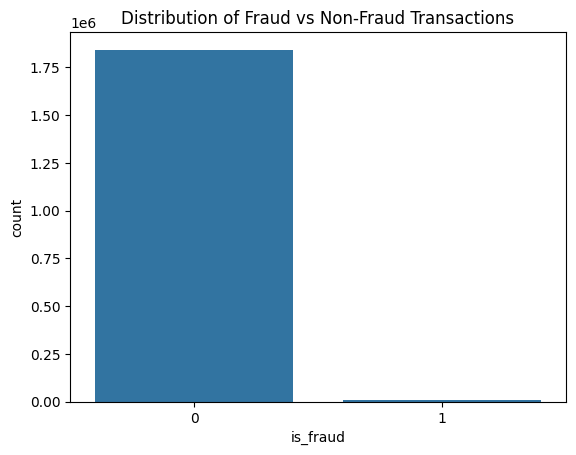

In [16]:
sns.countplot(x='is_fraud', data=full_df)
plt.title("Distribution of Fraud vs Non-Fraud Transactions")
plt.show()


In [17]:
print("Duplicate index count (before reset):", full_df.index.duplicated().sum())
full_df.reset_index(drop=True, inplace=True)
print("Duplicate index count (after reset):", full_df.index.duplicated().sum())


Duplicate index count (before reset): 0
Duplicate index count (after reset): 0


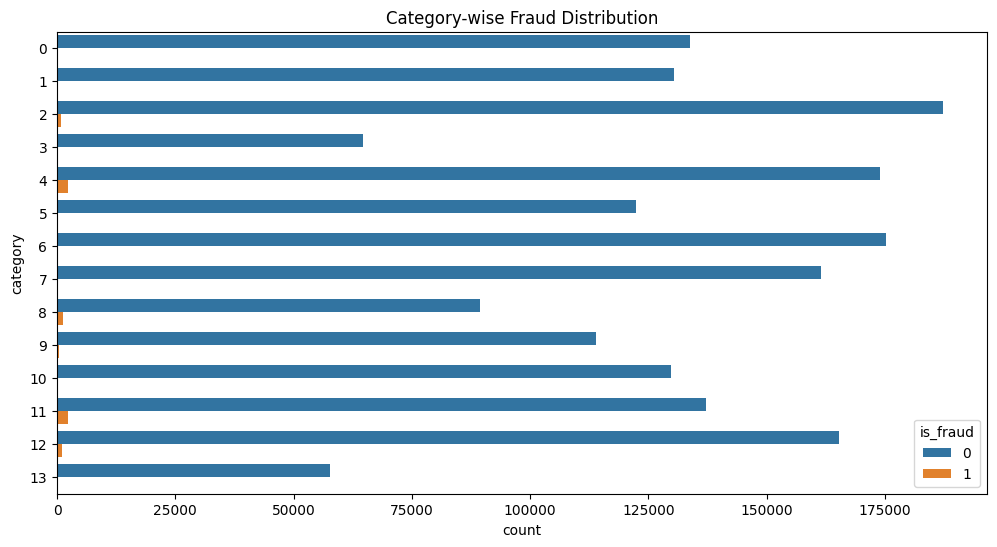

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(y='category', hue='is_fraud', data=full_df)
plt.title('Category-wise Fraud Distribution')
plt.show()


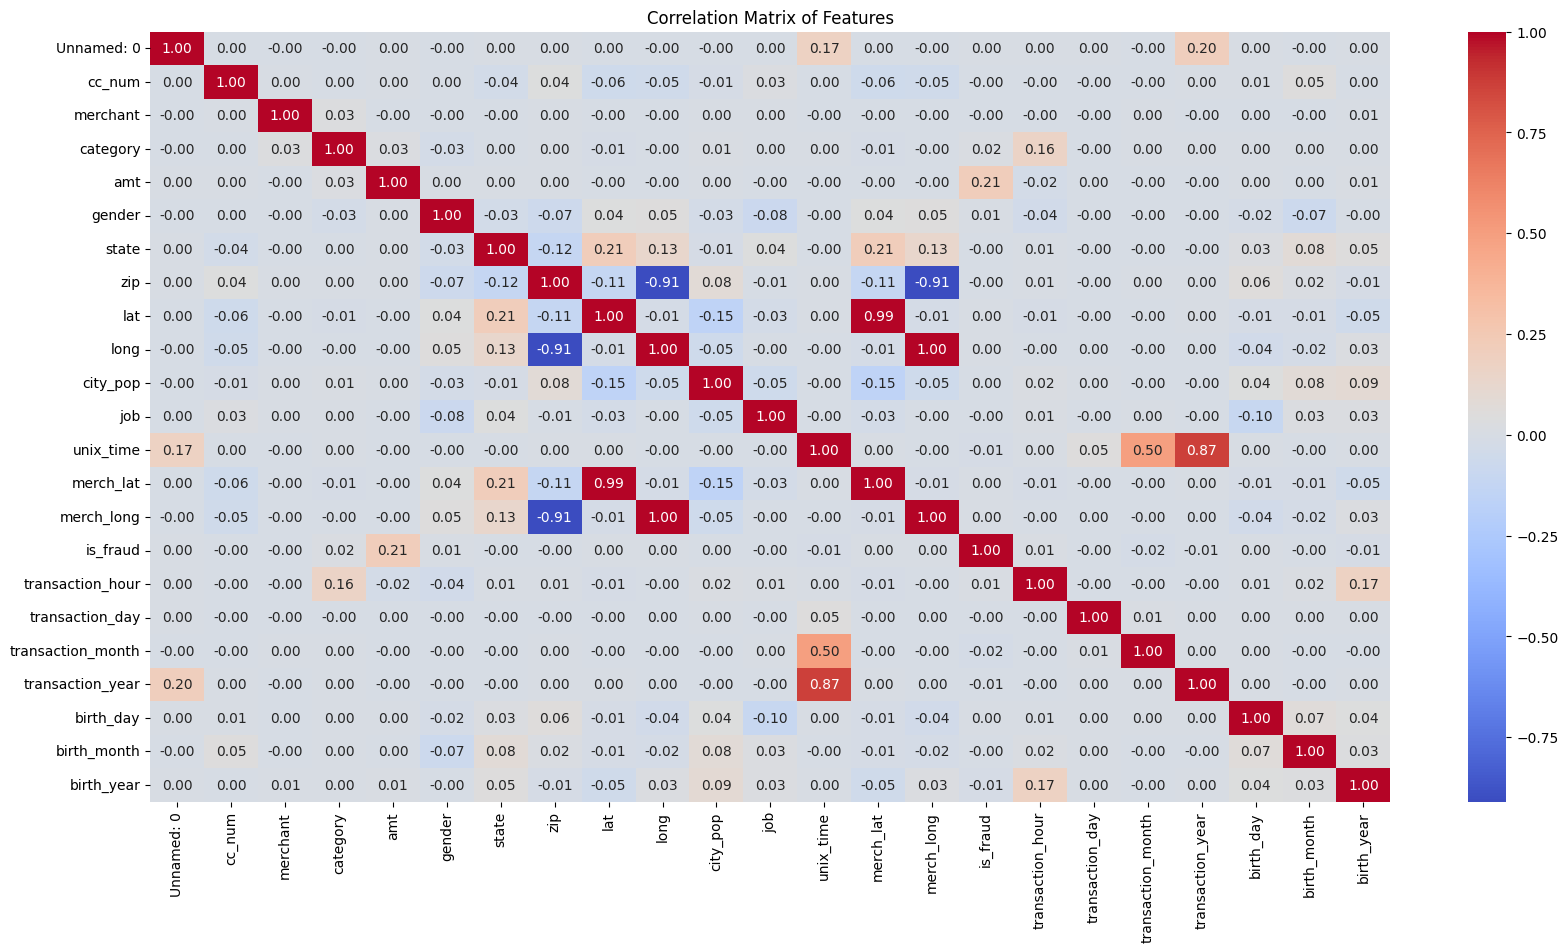

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(full_df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.show()


In [20]:
features = full_df.drop('is_fraud', axis=1)
labels = full_df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=42)


In [21]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)

# Metrics
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.79      0.84      0.81      1930

    accuracy                           1.00    370479
   macro avg       0.90      0.92      0.91    370479
weighted avg       1.00      1.00      1.00    370479

Confusion Matrix:
 [[368132    417]
 [   317   1613]]
Accuracy Score: 0.9980187810915059


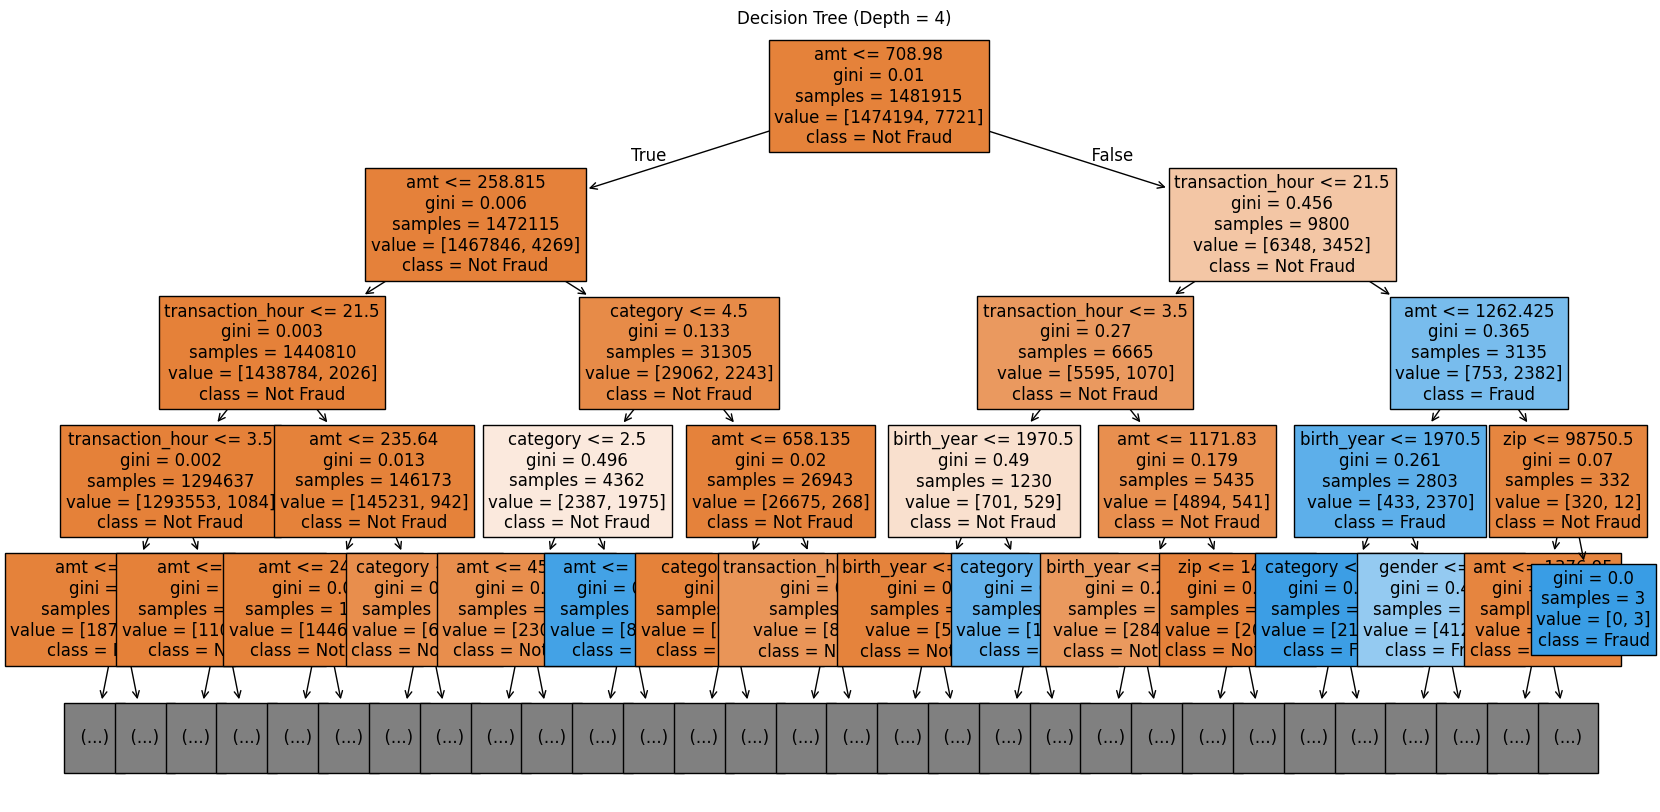

In [22]:
plt.figure(figsize=(20, 10))
plot_tree(dtree, max_depth=4, feature_names=features.columns, class_names=["Not Fraud", "Fraud"], filled=True, fontsize=12)
plt.title("Decision Tree (Depth = 4)")
plt.show()


In [23]:
leaf_ids = [node for node in range(dtree.tree_.node_count)
            if dtree.tree_.children_left[node] == dtree.tree_.children_right[node]]

print(f"Total Leaf Nodes: {len(leaf_ids)}\n")
print("Leaf Node Samples & Class Distribution:\n")

for node in leaf_ids:
    print(f"Node {node}: Samples = {dtree.tree_.n_node_samples[node]}, Class Counts = {dtree.tree_.value[node]}")


Total Leaf Nodes: 2231

Leaf Node Samples & Class Distribution:

Node 7: Samples = 3527, Class Counts = [[1. 0.]]
Node 11: Samples = 442, Class Counts = [[0. 1.]]
Node 14: Samples = 1, Class Counts = [[1. 0.]]
Node 17: Samples = 87, Class Counts = [[0. 1.]]
Node 19: Samples = 1, Class Counts = [[1. 0.]]
Node 20: Samples = 4, Class Counts = [[0. 1.]]
Node 22: Samples = 1, Class Counts = [[0. 1.]]
Node 23: Samples = 1, Class Counts = [[1. 0.]]
Node 24: Samples = 2, Class Counts = [[1. 0.]]
Node 27: Samples = 2, Class Counts = [[1. 0.]]
Node 31: Samples = 13, Class Counts = [[0. 1.]]
Node 32: Samples = 1, Class Counts = [[1. 0.]]
Node 34: Samples = 4, Class Counts = [[1. 0.]]
Node 36: Samples = 4, Class Counts = [[0. 1.]]
Node 37: Samples = 1, Class Counts = [[1. 0.]]
Node 38: Samples = 2, Class Counts = [[1. 0.]]
Node 39: Samples = 11, Class Counts = [[1. 0.]]
Node 45: Samples = 18, Class Counts = [[0. 1.]]
Node 47: Samples = 1, Class Counts = [[1. 0.]]
Node 48: Samples = 1, Class Counts

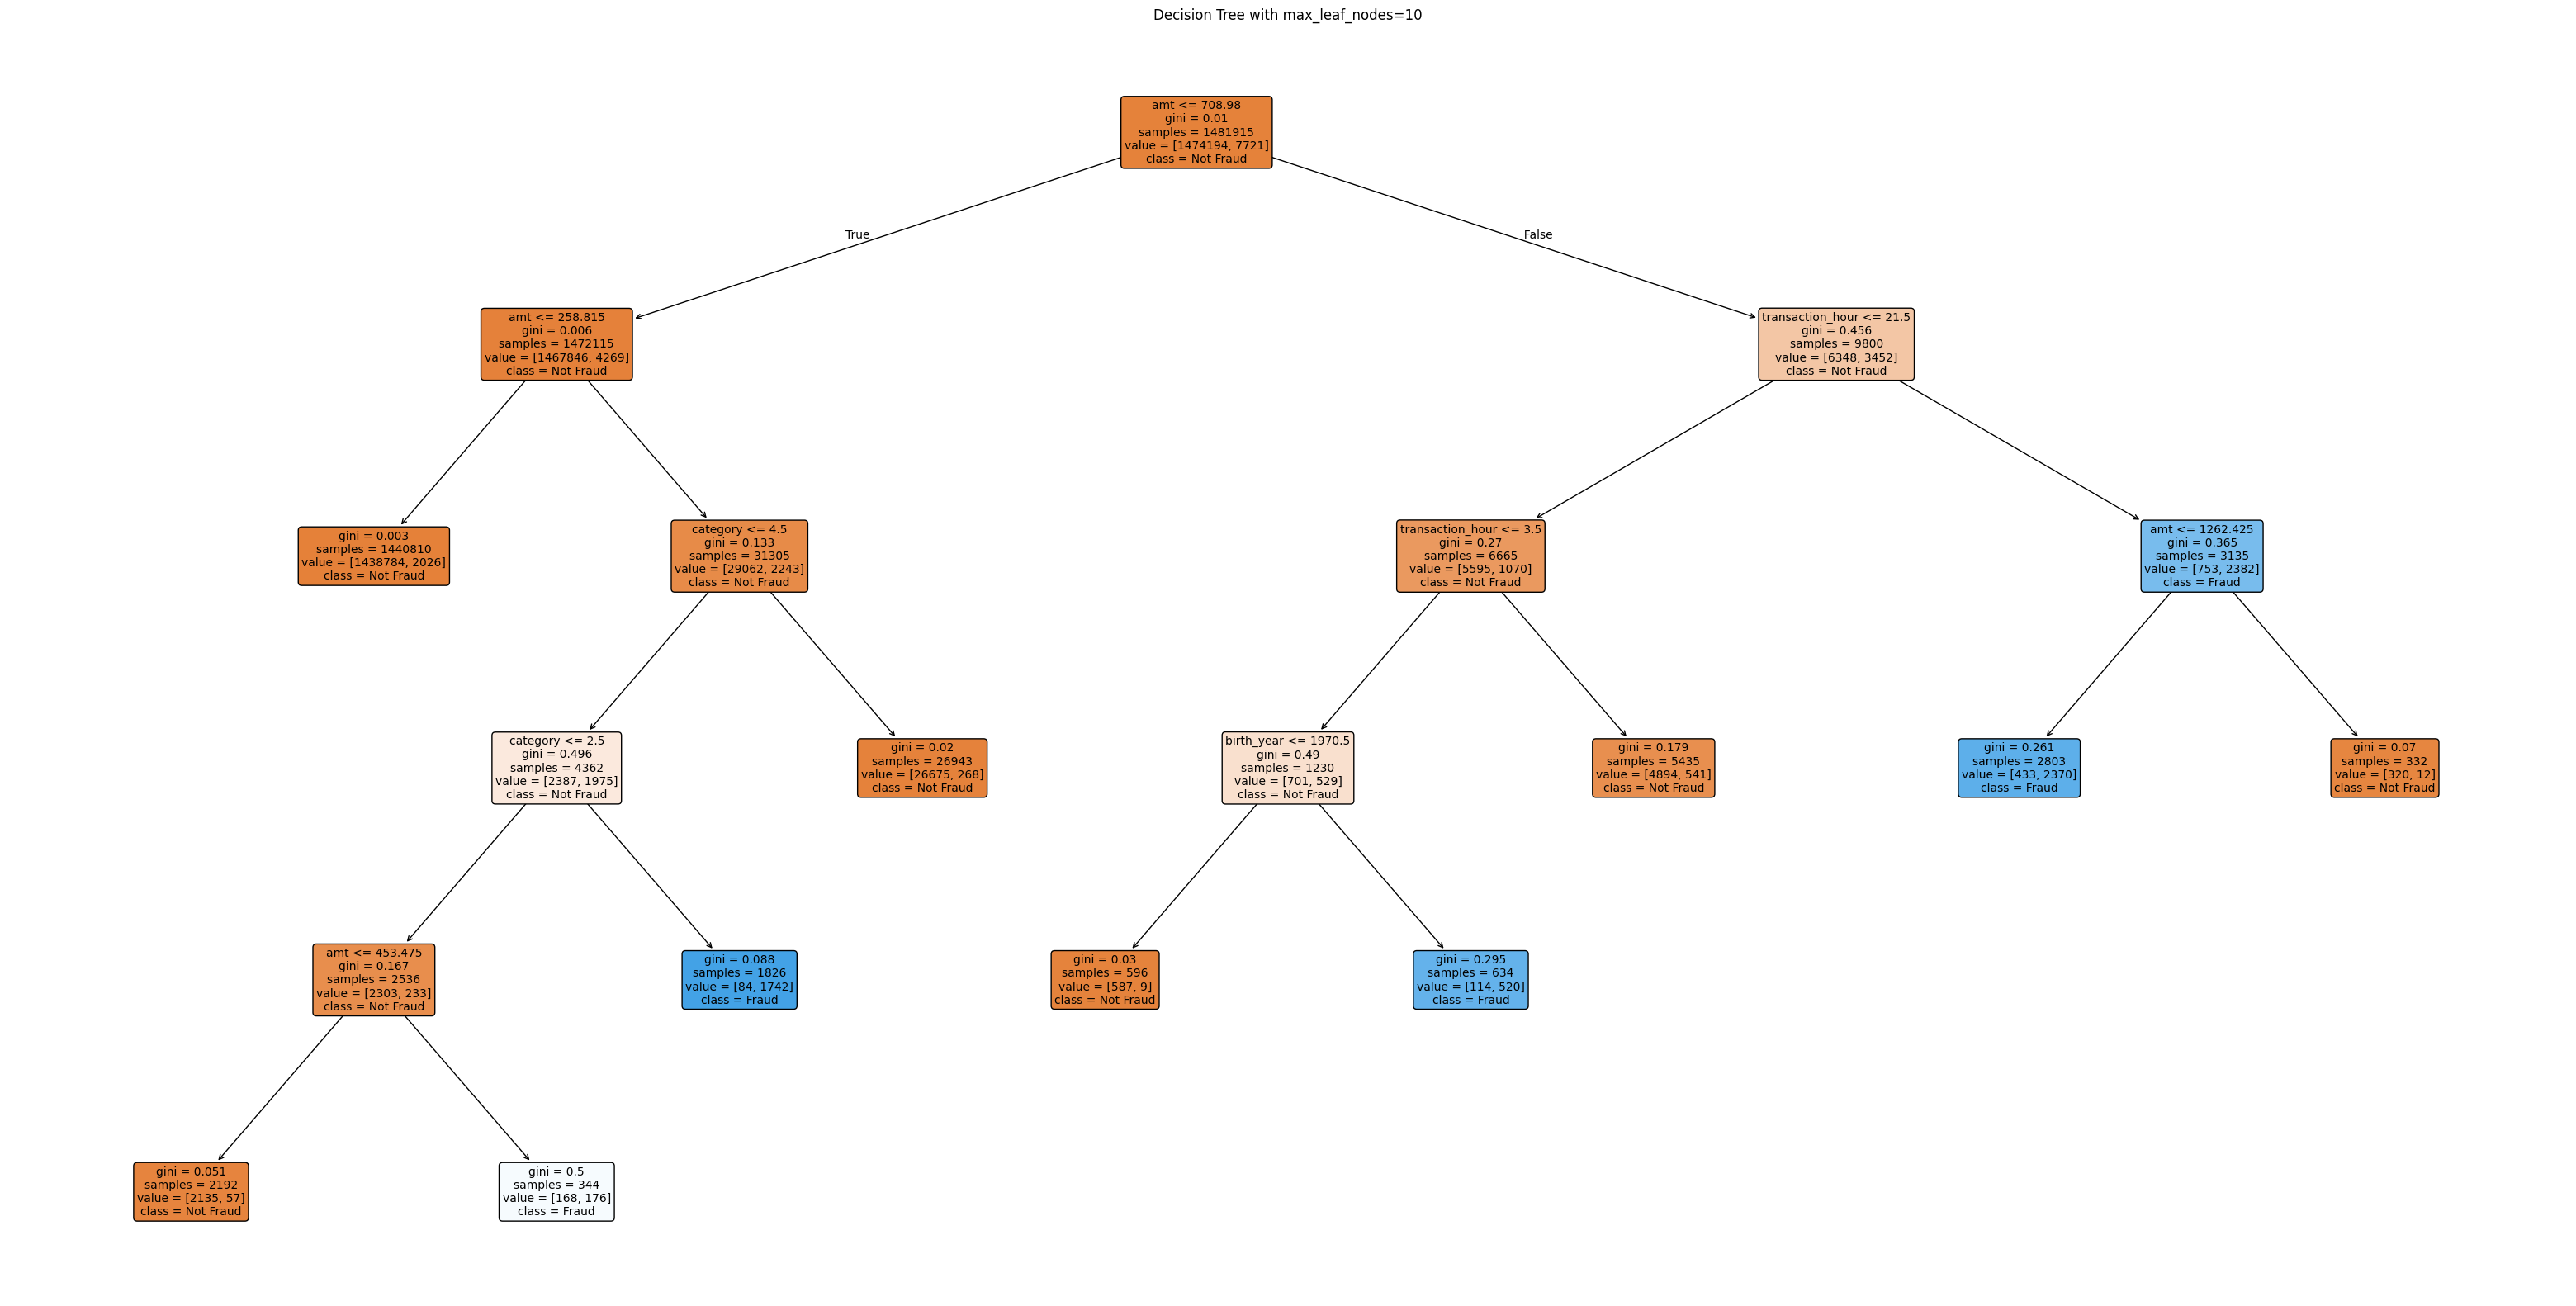

In [24]:
limited_tree = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
limited_tree.fit(X_train, y_train)

plt.figure(figsize=(40, 20))
plot_tree(limited_tree,
          feature_names=features.columns,
          class_names=["Not Fraud", "Fraud"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree with max_leaf_nodes=10")
plt.show()
